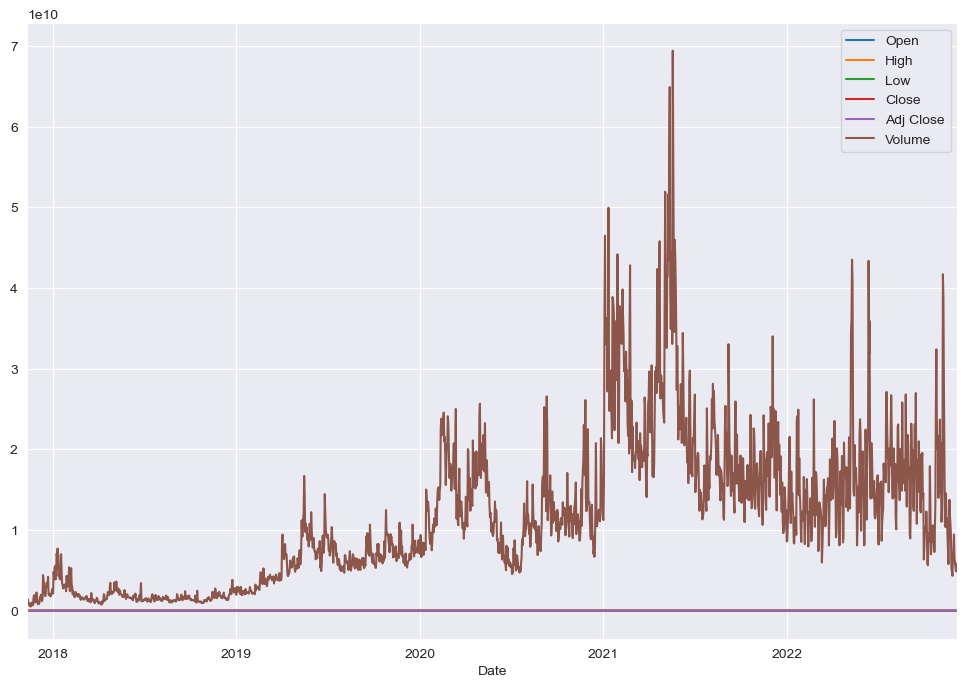

In [22]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import Timestamp

# Load data
df = pd.read_csv('ETH-EUR_11_11_2017-07_12_2022.csv', index_col='Date', parse_dates=True)
df.index = pd.to_datetime(df.index)

# Plot data
df.plot(figsize=(12,8))
plt.show()


ADF Statistic: -1.3948225858602588
p-value: 0.5847557035668874
Critical Values:
	1%: -3.4339186491956246
	5%: -2.8631163592632403
	10%: -2.5676091993407035


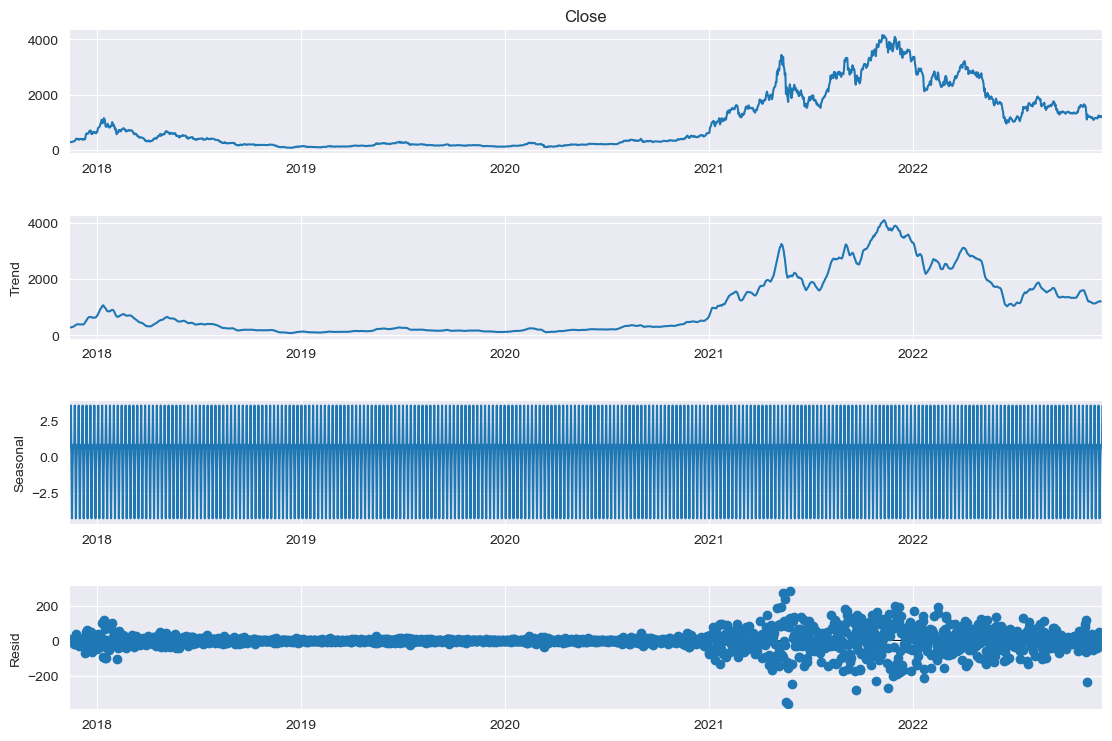

In [23]:

# Perform Dickey-Fuller test
result = adfuller(df['Close'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Close'], model='additive')
fig = decomposition.plot()
fig.set_size_inches(12,8)
plt.show()


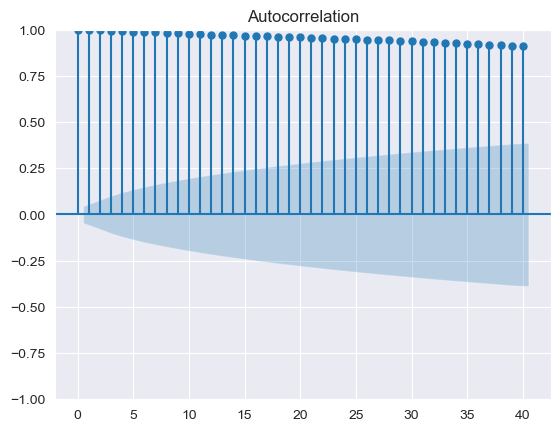

C:\Users\User\anaconda3\envs\deep_learning_2\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


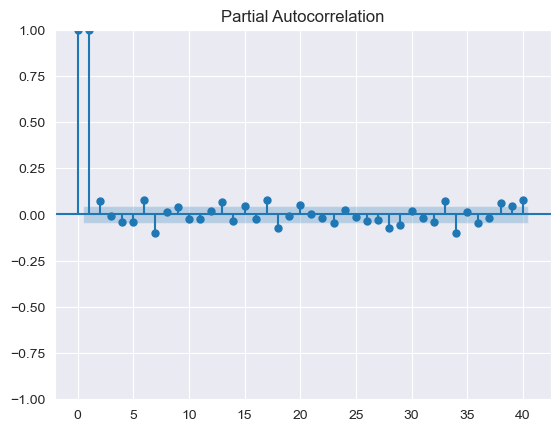

In [24]:

# Plot ACF and PACF
plot_acf(df['Close'], lags=40)
plt.show()
plot_pacf(df['Close'], lags=40)
plt.show()


C:\Users\User\anaconda3\envs\deep_learning_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


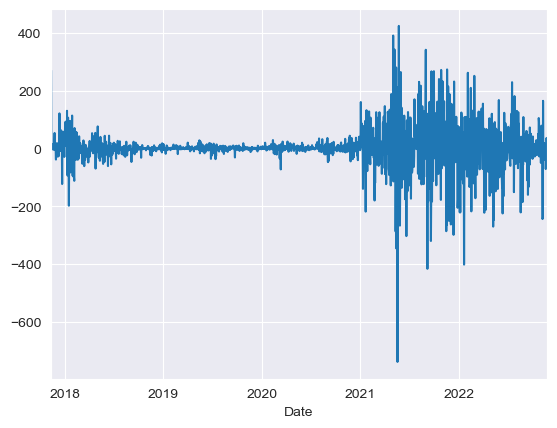

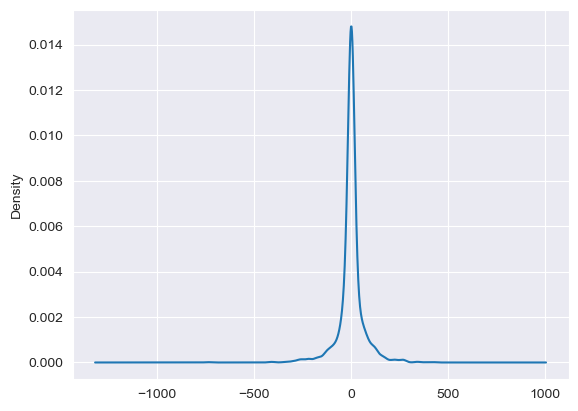

count    1841.000000
mean        0.652452
std        68.166734
min      -739.092730
25%       -10.396876
50%         0.349156
75%        12.829754
max       423.745720
dtype: float64


In [25]:

# Split data into train and test sets
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

# Fit ARIMA model
model = ARIMA(train['Close'], order=(1,1,1))
results = model.fit()
results.summary()

# Plot residuals
results.resid.plot()
plt.show()
results.resid.plot(kind='kde')
plt.show()
print(results.resid.describe())



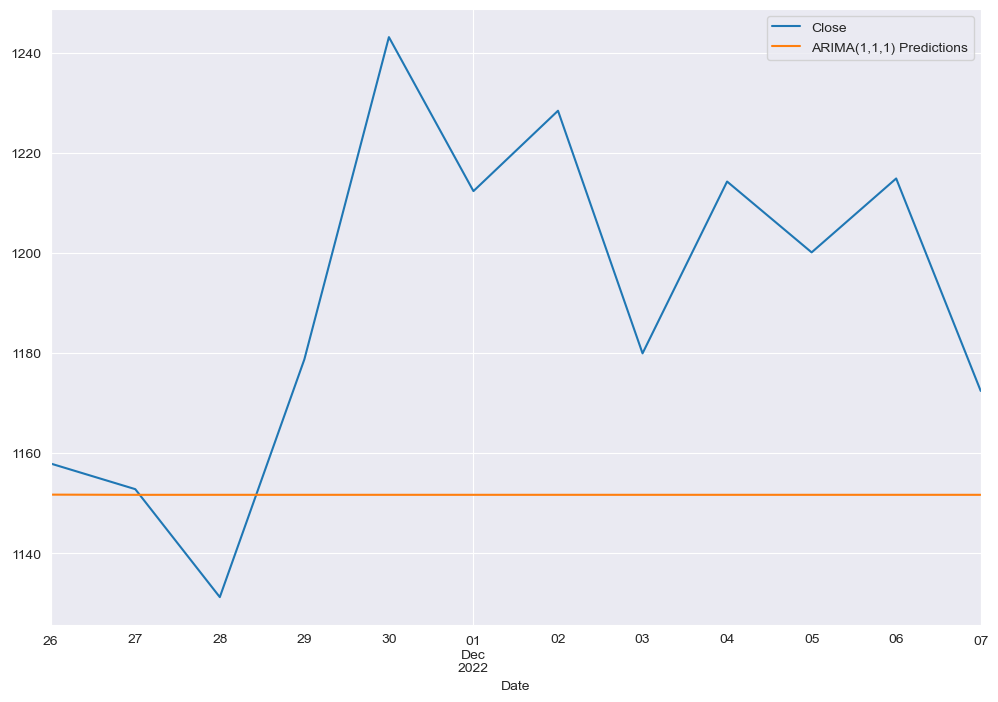

In [26]:
# Forecast
start = len(train)
end = len(train) + len(test) - 1
predictions = results.predict(start=start, end=end, dynamic=False).rename('ARIMA(1,1,1) Predictions')

# Plot predictions against known values
test['Close'].plot(figsize=(12,8), legend=True)
predictions.plot(legend=True)
plt.show()



RMSE: 50.49530535980267


C:\Users\User\anaconda3\envs\deep_learning_2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


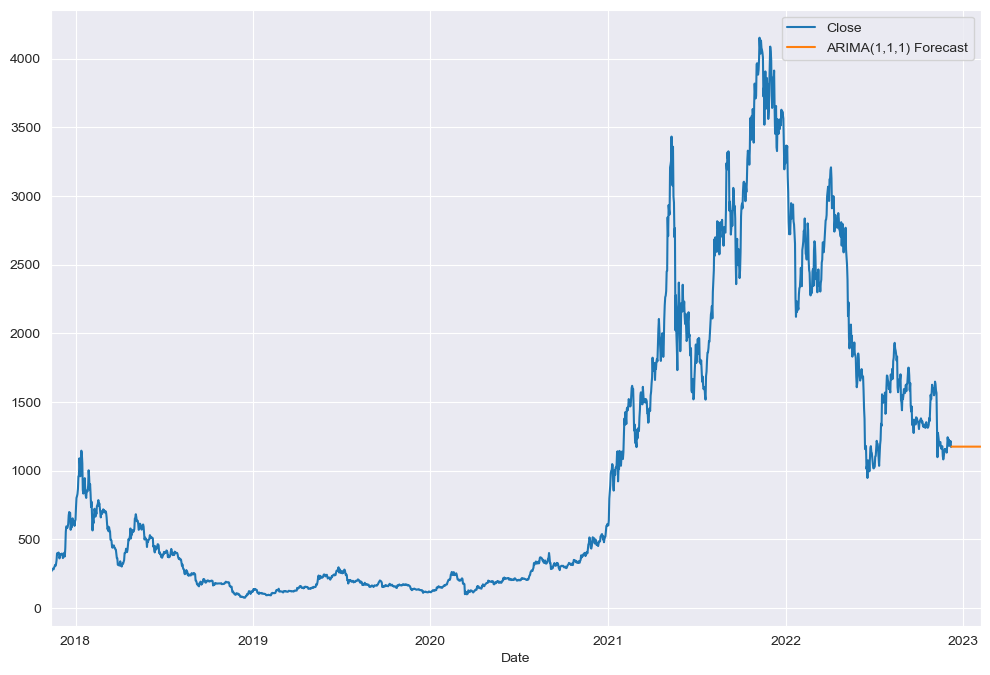

In [27]:
# Calculate RMSE
rmse = sqrt(mean_squared_error(test['Close'], predictions))
print('RMSE: {}'.format(rmse))

# Forecast into the future
model = ARIMA(df['Close'], order=(1,1,1))
results = model.fit()
fcast = results.predict(len(df), len(df)+60, typ='levels').rename('ARIMA(1,1,1) Forecast')

# Plot forecast against known values
df['Close'].plot(figsize=(12,8), legend=True)
fcast.plot(legend=True)
plt.show()